<a href="https://colab.research.google.com/github/pavankalyan369/Hand-Written-Digit-Recongnition-System/blob/main/handwritten_digit_recongition_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np


Load & Preprocess MNIST Data

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Build the CNN Model

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile and Train the Model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.8835 - loss: 0.3735 - val_accuracy: 0.9845 - val_loss: 0.0503
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.9835 - loss: 0.0528 - val_accuracy: 0.9878 - val_loss: 0.0411
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.9894 - loss: 0.0354 - val_accuracy: 0.9882 - val_loss: 0.0364
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9914 - loss: 0.0267 - val_accuracy: 0.9910 - val_loss: 0.0331
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.9942 - loss: 0.0181 - val_accuracy: 0.9920 - val_loss: 0.0300


Evaluate the Model

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9878 - loss: 0.0420
Test accuracy: 99.14%


Plot Accuracy Over Epochs


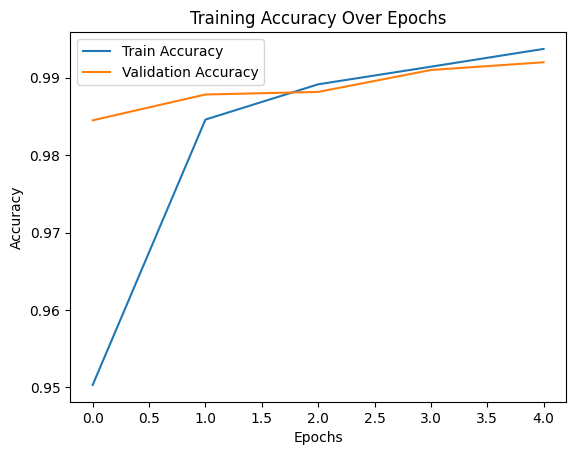

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()


Upload and Predict Custom Image

In [ ]:
from google.colab import files
uploaded = files.upload()


Preprocess & Predict Uploaded Image


In [ ]:
import cv2

# Load and preprocess uploaded image
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = 255 - img  # invert colors if needed
img = img.astype('float32') / 255.0
img = img.reshape(1, 28, 28, 1)

# Predict
prediction = model.predict(img)
predicted_class = np.argmax(prediction)
print(f"Predicted Digit: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted Digit: 6


Display the Image with Prediction

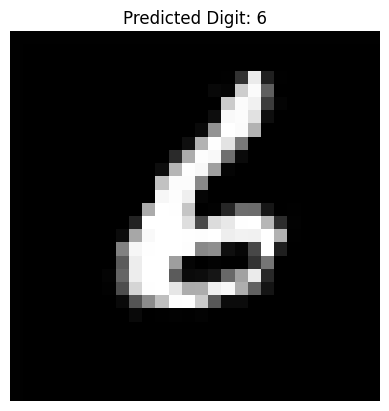

In [ ]:
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_class}")
plt.axis('off')
plt.show()
